<a href="https://colab.research.google.com/github/Henil21/University-Research/blob/main/ITM_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MRI Classification using CNN
**Index**

```
1. Fetching data ⛅ 
2. Helper function for visualizing  our data 🆘
3. visualizing the training data distribution 🔎
4. pre processing ⚙
5. Lets step into modeling 🕺
6. Helperfunction for plotting loss curves 📉
7. Adam V/S RMSprop 🤜
```
```
2.0  Brain MRI Classification 🧠
2.1  visualizing  our data 🔍
2.2  pre processing ⚙
2.3 Model Building 🕺
2.4 Plottin Loss 📉
```

In [1]:
!nvidia-smi  -L
# making sure GPU is connected ✅

GPU 0: Tesla T4 (UUID: GPU-7170b481-1d78-b436-96f0-592931a3e077)


##*1 Getting the data ⛅*

In [2]:
#fetching the data from cloud
Chest_train='/content/drive/MyDrive/Chest/'
Chest_test='/content/drive/MyDrive/Chest-Test'

##2  *Helper function for Visualizing*🆘

In [3]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir,target_class):
 
   # getting class vise dir link
   target=target_dir+target_class

   # taking 1 random image from a list of all images under a class
   random_img=random.sample(os.listdir(target),1)

   #as we have stored it in list we need to access it through index which is zero
   image=mpimg.imread(target+'/'+random_img[0])

   fig = plt.figure(figsize=(5, 2))  # Set the width and height of the figure

   
   #plotting image
   plt.imshow(image)
   
   plt.axis("off")
   print(f"img shape:{image.shape}")

img shape:(200, 300)


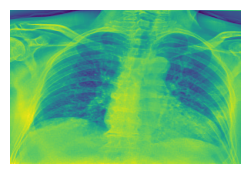

In [4]:
view_random_image(target_dir=Chest_train,target_class='COVID-19')

## 3 Lets visualize the distribution of the training data 🔍

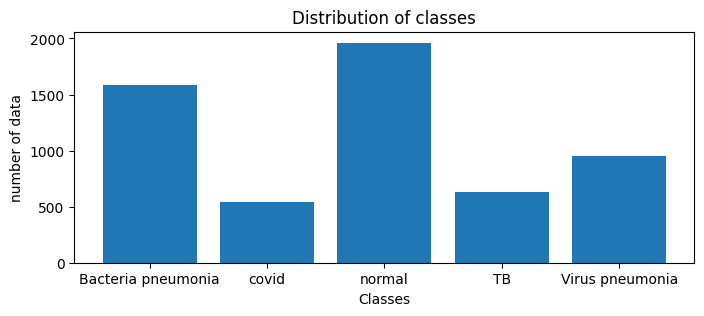

In [5]:

# getting length of the sub classes
BAC_n=len(os.listdir('/content/drive/MyDrive/Chest/Bacteria pneumonia'))
COVID=len(os.listdir('/content/drive/MyDrive/Chest/COVID-19'))
Normal=len(os.listdir('/content/drive/MyDrive/Chest/NORMAL'))
TB=len(os.listdir('/content/drive/MyDrive/Chest/Tuberculosis'))
virus_n=len(os.listdir('/content/drive/MyDrive/Chest/Virus pneumonia'))

classes=['Bacteria pneumonia', "covid",'normal','TB','Virus pneumonia']
values=[BAC_n,COVID,Normal,TB,virus_n]

fig = plt.figure(figsize=(8, 3))  # Set the width and height of the figure

plt.bar(classes,values)
 
# Adding title to the plot
plt.title("Distribution of classes")
 
# Adding label on the y-axis
plt.ylabel('number of data')
 
# Adding label on the x-axis
plt.xlabel('Classes')

plt.show()

## 4.Pre-processing ⚙

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# recaling pixels 
train_data_gen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=0.2,#how much do you want to rotate an image
                                     shear_range=0.2,#how much you want to shear an iamge
                                     zoom_range=0.2,#how much you wanna zoom in 
                                     width_shift_range=0.2,#move image on x axis
                                     height_shift_range=0.2,# move image on y axis
                                     horizontal_flip=True)

# dividing into batches and  
train_generator = train_data_gen.flow_from_directory(
    Chest_train,
    target_size=(224,224), #targeted shape
    batch_size=32, #32  images per batch
    class_mode='categorical', # we are working with multiclass problem
    shuffle=True
)


# recaling pixels 
test_data_gen = ImageDataGenerator(rescale=1./255
                                                              )

# dividing into batches and  
test_generator = train_data_gen.flow_from_directory(
    Chest_test,
    target_size=(224, 224), #targeted shape
    batch_size=32, #32  images per batch
    class_mode='categorical',# we are working with multiclass problem
    shuffle=True
)

Found 5669 images belonging to 5 classes.
Found 1395 images belonging to 5 classes.


In [54]:
import os

# Specify the path to the directory you want to list subdirectories for
directory_path = '/content/drive/MyDrive/Chest-Test'

# Use the os.listdir() function to get a list of all items (files and directories) in the specified directory
items = os.listdir(directory_path)

# Iterate over the items and check if they are directories
subdirectories = []
for item in items:
    item_path = os.path.join(directory_path, item)
    if os.path.isdir(item_path):
        subdirectories.append(item)

# Print the list of subdirectories
print(subdirectories)


['Tuberculosis', 'COVID-19', 'NORMAL', 'Bacteria pneumonia', 'Virus pneumonia']


> we got 5669 images divided into 5 sub-classes for training 

> 1395 images divided into 5 sub-classes for testing

> total image [training+test]= 7064

run below cell if u wanna see numeric representation

In [ ]:
train_generator[0]

## **5. Lets step into modeling 🕺**

In [56]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras import Sequential


tf.random.set_seed(42) #why 42? because it is Answer to the Ultimate Question of Life, the Universe, and Everything if you know you know 

Model_1=Sequential([
    Conv2D(32,3,activation='relu', input_shape=(224,224,3)),  #3 is kernal size 
    MaxPool2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax') # softmax as we are working with multiclass problem
])


In [57]:
Model_1.compile(loss='categorical_crossentropy', # as we got multiple classes
                            optimizer=tf.keras.optimizers.RMSprop(), # for now lets dont specify the learning rate,  default is 0.001 and we will also try Rmspromp 
                            metrics=['accuracy'])# evaluation 


In [58]:
history=Model_1.fit(train_generator, 
                   epochs=10,
                    steps_per_epoch=len(train_generator ), 
                   validation_data=(test_generator),
                   validation_steps=len(test_generator ))

Epoch 1/10
178/178 [==============================] - 127s 703ms/step - loss: 1.2744 - accuracy: 0.4669 - val_loss: 1.1236 - val_accuracy: 0.4609
Epoch 2/10
178/178 [==============================] - 141s 793ms/step - loss: 0.9900 - accuracy: 0.5987 - val_loss: 1.0194 - val_accuracy: 0.5663
Epoch 3/10
178/178 [==============================] - 123s 692ms/step - loss: 0.9542 - accuracy: 0.6260 - val_loss: 0.7666 - val_accuracy: 0.6839
Epoch 4/10
178/178 [==============================] - 142s 801ms/step - loss: 0.9230 - accuracy: 0.6342 - val_loss: 0.7604 - val_accuracy: 0.7154
Epoch 5/10
178/178 [==============================] - 129s 724ms/step - loss: 0.8739 - accuracy: 0.6481 - val_loss: 0.8345 - val_accuracy: 0.6688
Epoch 6/10
178/178 [==============================] - 124s 695ms/step - loss: 0.8666 - accuracy: 0.6590 - val_loss: 0.7698 - val_accuracy: 0.7233
Epoch 7/10
178/178 [==============================] - 123s 691ms/step - loss: 0.9290 - accuracy: 0.6705 - val_loss: 0.7646 -

## 6.helperfunction for plotting loss curves 📉

In [59]:
import numpy as np
y_pred=np.argmax(Model_1.predict(test_generator), axis=-1)
y_pred[10]

44/44 [==============================] - 22s 509ms/step


array([2, 0, 2, ..., 2, 4, 0])

In [62]:
Model_1.evaluate(test_generator)

44/44 [==============================] - 27s 617ms/step - loss: 0.6424 - accuracy: 0.7491


[0.6423933506011963, 0.7491039633750916]

In [63]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model_accuracy = accuracy_score(test_generator.classes, y_pred)
model_precision = precision_score(test_generator.classes, y_pred, average='weighted')
model_recall = recall_score(test_generator.classes, y_pred, average='weighted')
model_f1 = f1_score(test_generator.classes, y_pred, average='weighted')

In [74]:
test_generator.classes[:10] ==y_pred[:10]

array([False,  True, False,  True, False,  True,  True, False, False,
       False])

In [69]:
 model_accuracy = accuracy_score(test_generator.classes, y_pred) * 100
 print(model_accuracy)
 print("classes",test_generator.classes)
 print("y_pred",y_pred)


35.913978494623656
classes [0 0 0 ... 4 4 4]
y_pred [2 0 2 ... 2 4 0]


In [64]:
print(test_generator.classes)
print(model_accuracy)
print(model_precision)
print(model_f1)
print(model_recall)



[0 0 0 ... 4 4 4]
0.35913978494623655
0.32383920910382996
0.3396280813151164
0.35913978494623655


In [12]:
import pandas as pd
def plot_loss_curves(hist):
    pd.DataFrame(hist.history).plot(figsize=(5,5))

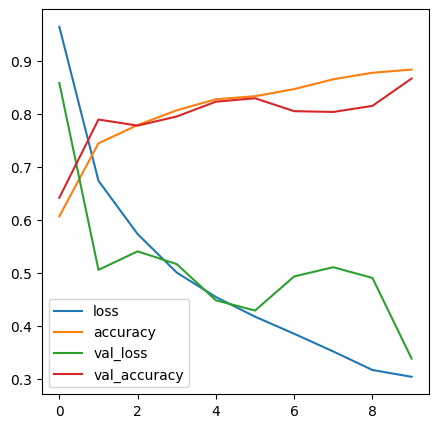

In [13]:
plot_loss_curves(history)

## 7.Adam V/S RMSprop 🤜

In [14]:
tf.random.set_seed(42)

Model_2=Sequential([
    Conv2D(32,3,activation='relu', input_shape=(224,224,3)),  #3 is kernal size 
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(5, activation='softmax') # softmax as we are working with multiclass problem
])
Model_2.compile(loss='categorical_crossentropy', # as we got multiple classes
                            optimizer=tf.keras.optimizers.Adam(), # for now lets dont specify the learning rate,  default is 0.001 and we will also try Rmspromp 
                            metrics=['accuracy'])# evaluation 

history_2=Model_2.fit(train_generator, 
                   epochs=10,
                    steps_per_epoch=len(train_generator ), 
                   validation_data=(test_generator),
                   validation_steps=len(test_generator ))

Epoch 1/10
178/178 [==============================] - 30s 160ms/step - loss: 0.9641 - accuracy: 0.6056 - val_loss: 0.7076 - val_accuracy: 0.7039
Epoch 2/10
178/178 [==============================] - 29s 160ms/step - loss: 0.6217 - accuracy: 0.7567 - val_loss: 0.6028 - val_accuracy: 0.7441
Epoch 3/10
178/178 [==============================] - 28s 158ms/step - loss: 0.5736 - accuracy: 0.7762 - val_loss: 0.4986 - val_accuracy: 0.7864
Epoch 4/10
178/178 [==============================] - 42s 237ms/step - loss: 0.4821 - accuracy: 0.8081 - val_loss: 0.4390 - val_accuracy: 0.8065
Epoch 5/10
178/178 [==============================] - 33s 184ms/step - loss: 0.4482 - accuracy: 0.8248 - val_loss: 0.4574 - val_accuracy: 0.8093
Epoch 6/10
178/178 [==============================] - 29s 161ms/step - loss: 0.3877 - accuracy: 0.8485 - val_loss: 0.4079 - val_accuracy: 0.8251
Epoch 7/10
178/178 [==============================] - 30s 170ms/step - loss: 0.3544 - accuracy: 0.8591 - val_loss: 0.4107 - val_ac

>  we are getting 86% accuracy with adam with same model architecture 

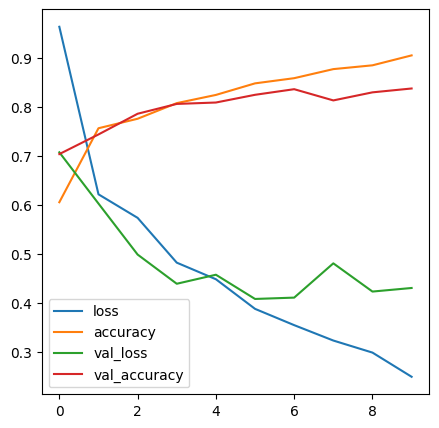

In [15]:
plot_loss_curves(history_2)

#2.0  Brain MRI Classification 🧠

In [16]:
Brain_train='/content/drive/MyDrive/Brain_multiclass/Training/'
Brain_test='/content/drive/MyDrive/Brain_multiclass/Testing/'

## 2.1 visualizing  our data **🔍**

img shape:(512, 512)


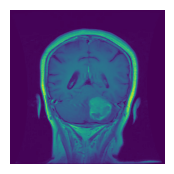

In [17]:
view_random_image(target_dir=Brain_train,target_class='meningioma')

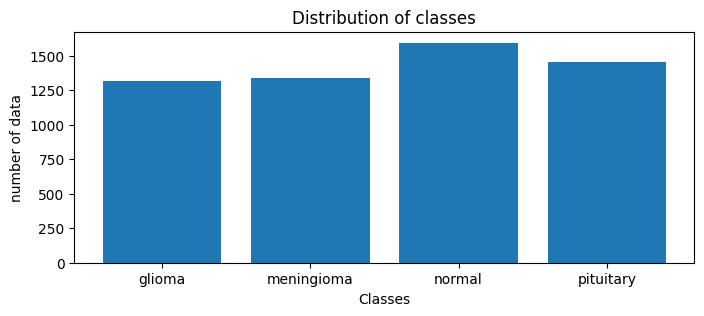

In [18]:

# getting length of the sub classes
gol=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/glioma'))
men=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/meningioma'))
Normal=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/notumor'))
pit=len(os.listdir('/content/drive/MyDrive/Brain_multiclass/Training/pituitary'))

classes=['glioma', "meningioma",'normal','pituitary']
values=[gol,men,Normal,pit]

fig = plt.figure(figsize=(8, 3))  # Set the width and height of the figure

plt.bar(classes,values)
 
# Adding title to the plot
plt.title("Distribution of classes")
 
# Adding label on the y-axis
plt.ylabel('number of data')
 
# Adding label on the x-axis
plt.xlabel('Classes')

plt.show()

## 2.2 Pre-processing ⚙

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# recaling pixels 
train_data_gen = ImageDataGenerator(rescale=1./255)

# dividing into batches and  
train_generator_brain = train_data_gen.flow_from_directory(
    Brain_train,
    target_size=(224, 224), #targeted shape
    batch_size=32, #32  images per batch
    class_mode='categorical' # we are working with multiclass problem
)


# recaling pixels 
test_data_gen_brain = ImageDataGenerator(rescale=1./255)

# dividing into batches and  
test_generator_brain = train_data_gen.flow_from_directory(
    Brain_test,
    target_size=(224, 224), #targeted shape
    batch_size=32, #32  images per batch
    class_mode='categorical' # we are working with multiclass problem
)

Found 5712 images belonging to 4 classes.
Found 1316 images belonging to 4 classes.


In [20]:
# train_generator[0] 


## 2.3 Model Building 🕺

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras import Sequential
tf.random.set_seed(42)

Model_2=Sequential([
    Conv2D(32,3,activation='relu', input_shape=(224,224,3)),  #3 is kernal size 
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(4, activation='softmax') # softmax as we are working with multiclass problem
])
Model_2.compile(loss='categorical_crossentropy', # as we got multiple classes
                            optimizer=tf.keras.optimizers.Adam(), # for now lets dont specify the learning rate,  default is 0.001 and we will also try Rmspromp 
                            metrics=['accuracy'])# evaluation 

history_2=Model_2.fit(train_generator_brain, 
                   epochs=10,
                    steps_per_epoch=len(# dividing into batches and  
                  train_generator_brain  ), 
                   validation_data=(test_generator_brain),
                   validation_steps=len(test_generator_brain ))

Epoch 1/10
  9/179 [>.............................] - ETA: 30:02 - loss: 1.3773 - accuracy: 0.3750

KeyboardInterrupt: ignored

## 2.4 Plottin Loss 📉

In [ ]:
plot_loss_curves(history_2)

## 2.5 RMSprop

In [ ]:
model_3=Sequential([
    Conv2D(32,3,activation='relu', input_shape=(224,224,3)),  #3 is kernal size 
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(4, activation='softmax') # softmax as we are working with multiclass problem
])
# we clone the above model  architecture 
model_3.compile(loss='categorical_crossentropy', # as we got multiple classes
                            optimizer=tf.keras.optimizers.RMSprop(), # for now lets dont specify the learning rate,  default is 0.001 and we will also try Rmspromp 
                            metrics=['accuracy'])# evaluation 

history_3=Model_2.fit(train_generator_brain, 
                   epochs=10,
                    steps_per_epoch=len(# dividing into batches and  
                  train_generator_brain  ), 
                   validation_data=(test_generator_brain),
                   validation_steps=len(test_generator_brain ))

In [ ]:
import numpy as np
y_pred=np.argmax(model_3.predict(test_generator_brain), axis=-1)